# Data Science Project - HDB Resale Price Predictions

By AI-0401 Class Team 3
(Bishmer, Aveline, Seow Ling, Gavin and Swee Koon)

## Data Science Methodology

### 1. Planning Analytics
    1.1 Understanding Business (using EDT)
    1.2 Data Requirements
    1.3 Data Collection
    1.4 Data Cleansing
    1.5 Data Understanding
    
### 2. Descriptive & Diagnostics Analytics
    2.1 Statistical Analysis
    2.2 Exploratory Visualization
    2.3 Data Formating
    2.4 Algorithm Alighment
    2.5 Data Visualization & Presentation
    
### <span style="color:red"> 3. Predictive & Prescriptive Analytics (Pending)</span>.
    3.1 Build Data Model
    3.2 Test Data Model
    3.3 Validate Data Model
    3.4 Evaluate Data Model    
   

_Version 1.3 - Updated on 9 Aug 2021_

In [1]:
# Check the Python Version

import sys
print(sys.version)
print(sys.version_info)


# Ignore any warnings

import warnings
warnings.filterwarnings("ignore")

3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


### 1.2 Data Requirements

Past HDB Resales Transactions (Core Data / from Jan 2017 to Nov 2020) - date, price, town, flat type, remaining_lease  

Amenities - geolocation  

Economical - GDP, CPI, Employment Rate and Household Income

In [2]:
# To record any other documentation or code for DATA CLEANSING here

### 1.3 Data Collection

In [3]:
# IMPORT relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re


In [4]:
# IMPORT the dataset - Past HDB Resale Transactions

hdb_data = pd.read_csv("hdb.csv")

In [5]:
# CHECK the dataset - first five (default) lines 

hdb_data.head() 

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [6]:
# CHECK the dataset - last five (default) lines 

hdb_data.tail()  

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
85124,2020-11,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 10 months,555000.0
85125,2020-11,YISHUN,EXECUTIVE,606,YISHUN ST 61,04 TO 06,142.0,Apartment,1987,66 years 01 month,545000.0
85126,2020-11,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,145.0,Maisonette,1987,66 years 01 month,645000.0
85127,2020-11,YISHUN,EXECUTIVE,828,YISHUN ST 81,07 TO 09,145.0,Apartment,1988,66 years 03 months,660000.0
85128,2020-11,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,07 TO 09,159.0,Multi Generation,1987,66 years,730000.0


### 1.4 Data Cleansing

## NOTE TO FILL THIS IN WITH MORE DETAIL WEDNESDAY FEB 17

In [7]:
# To record any documentation or code for DATA CLEANSING here

# CONVERT the month from Dtype <object> to <datetime64>
hdb_data['month'] = pd.to_datetime(hdb_data['month'],errors='coerce')


# CONVERT the remaining lease from Dtype <object> to <int64>
maxcount=hdb_data.count().max()
print(maxcount)

def lease_convert(x):
    match=re.search("(\d\d) [a-z]{4,5} (\d\d)",x)
    if match is None:
        justyear=re.search("(\d\d)",x)
        year=justyear.group(1)
        month=0
    else:
        year=match.group(1)
        month=match.group(2)
    intyear = int(year)
    intmonth= int(month)
    totdays = 365 * intyear + 30 * intmonth
    return(totdays)

for i in range (0,maxcount):
    foo=hdb_data.loc[i,'remaining_lease']
    bar=lease_convert(foo)
    hdb_data.loc[i,'remaining_lease']=bar
    
hdb_data['remaining_lease']=hdb_data['remaining_lease'].astype(str).astype(int)

85129


### 1.5 Data Understanding

In [8]:
# CHECK the dataset size

hdb_data.shape # 11 columns (Headers) and 85129 rows (observations)

(85129, 11)

In [9]:
# CHECK whether the dataset is proper using <.DTYPES> Object.Attribute

hdb_data.dtypes 

# see df.info() which is more comprehensive

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
remaining_lease                 int64
resale_price                  float64
dtype: object

In [10]:
# CHECK whether the dataset is proper using <INFO()> Object.Method())

hdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85129 entries, 0 to 85128
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                85129 non-null  datetime64[ns]
 1   town                 85129 non-null  object        
 2   flat_type            85129 non-null  object        
 3   block                85129 non-null  object        
 4   street_name          85129 non-null  object        
 5   storey_range         85129 non-null  object        
 6   floor_area_sqm       85129 non-null  float64       
 7   flat_model           85129 non-null  object        
 8   lease_commence_date  85129 non-null  int64         
 9   remaining_lease      85129 non-null  int64         
 10  resale_price         85129 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 7.1+ MB


In [11]:
# DO a statistical analysis of those numerical data

hdb_data.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
count,85129.000000,85129.000000,85129.000000,8.512900e+04
mean,97.674902,1994.261814,27278.835532,4.413404e+05
std,24.273262,12.935800,4708.498070,1.538151e+05
min,31.000000,1966.000000,16485.000000,1.400000e+05
25%,82.000000,1984.000000,23630.000000,3.300000e+05
50%,95.000000,1994.000000,27280.000000,4.100000e+05
75%,113.000000,2003.000000,30690.000000,5.180000e+05
max,249.000000,2019.000000,35675.000000,1.258000e+06


In [12]:
# DO a statistical analysis of ALL data

hdb_data.describe(include="all")

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
count,85129,85129,85129,85129,85129,85129,85129.000000,85129,85129.000000,85129.000000,8.512900e+04
unique,47,26,7,2468,551,17,NaN,20,NaN,NaN,NaN
top,2018-07-01 00:00:00,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,NaN,NaN
freq,2539,6879,35264,286,1299,19840,NaN,27817,NaN,NaN,NaN
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,97.674902,NaN,1994.261814,27278.835532,4.413404e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,24.273262,NaN,12.935800,4708.498070,1.538151e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,1966.000000,16485.000000,1.400000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,1984.000000,23630.000000,3.300000e+05


## A brief examination of the features of this dataset

## Month

'month' is the calendar month when a particular unit was re-sold. As with the
other features in this dataset, there are 85,129 recorded entries, capturing each
resale transaction.

The earliest value recorded for 'month' is 2017-01

The latest value recorded for 'month' is 2020-11

From the earliest and latest values above, we can derive the span of time encompassed
by 'month' as 3 years and 10 months.

In the raw data, 'month' is encoded as a string value, so it must be converted
into a python datetime object for use by the models later in our data preparation
step.

## Town
“Town” represents the housing regions segmented by the Singapore Housing Development Board. 
All the 26 towns are represented in this dataset and Sengkang is the town that has the highest number of resale transactions of 6,879. 
This is likely due to it being a newer town with a higher proportion of new flats reaching MOP

## Flat Type 
‘flat_type’ is the type of HDB flat available for sale. There are 7 unique flat types with 4 room being the popular one among resale transactions of 35,264. This is possibly due to the ideal number of household of about 4-5 people would require a 4 room flat

## Block

'block' is the block number of a resale unit.

In the list of 85,129 transactions, 2468 different block numbers are represented


## Street Name

'street_name' is the name of the street where a resale unit is located.

In the list of 85,129 transactions, 551 unique street names are represented.

'street_name' is not easily modelled as-is, but when combined with 'block' represents
a specific address. This can be converted into geographical data and represented in
geopandas.

## Storey Range
'storey_range' is the level of a building where a resale unit is located.

In the list of 85,129 transactions, 17 unique storey ranges are represented.

Generally, higher-storey units are valued more highly than lower-storey units. We
will examine if this relationship holds true for this data set.

## Floor Area
'floor_area_sqm' is the size of a resale unit, measured in square metres. The approximate floor area includes any recess area purchased, space adding items under HDB’s upgrading programmes, roof terrace and so on.

In the dataset, the smallest flat re-sold was **31 square metres**.

The largest flat re-sold was **249 square metres**

The average size of a resale flat was **97.67 square metres**

Generally, larger units are valued more highly than smaller units. We
expect this relationship to true for this data set.

## Flat Model
“Flat model” represents the types of flat layout and sizes build by the Singapore Housing Development Board since the 1960s. 
In this data set, we have 20 unique flat models with varying “Flat Types”, with Model A being the most resale transactions

## Lease commence date
‘lease_commence_date’ is the start date of the lease of the HDB unit, shown in year
The first lease commence date happened in 1966, with the average and median lease commence date occured in 1994.

## Remaining Lease
'remaining_lease' is the remaining lease period on the resale unit, listed in years
and months.

The shortest remaining lease period is 45 years and 2 months.

The longest remaining lease period is 97 years and 9 months

As it is represented in the raw data as a string, we will convert 'remaining_lease' into an integer number of days for ease of modelling.

## Resale Price
'resale_price' is our target variable for this exercise. It is the price of a
resale unit in Singapore dollars. The transactions exclude resale transactions that may not reflect the
full market price such as resale between relatives and resale of part shares

The highest price for a resale unit in this dataset was **$1,258,000**

The lowest price for a resale unit in this dataset was **$140,000**

The average price for a resale unit in this dataset was **$441,340.40**

### 2.1 Statistical Analysis

In [13]:
# Use GROUPBY to compute the MEAN resale price by Town and Flat Type

data_group1 = hdb_data[["town","flat_type","resale_price"]]
display(data_group1)

group1 = data_group1.groupby(["town","flat_type"],as_index=False).mean() # Mean Resale Price
display(group1)

,town,flat_type,resale_price
0,ANG MO KIO,2 ROOM,232000.0
1,ANG MO KIO,3 ROOM,250000.0
2,ANG MO KIO,3 ROOM,262000.0
3,ANG MO KIO,3 ROOM,265000.0
4,ANG MO KIO,3 ROOM,265000.0
...,...,...,...
85124,YISHUN,EXECUTIVE,555000.0
85125,YISHUN,EXECUTIVE,545000.0
85126,YISHUN,EXECUTIVE,645000.0
85127,YISHUN,EXECUTIVE,660000.0


,town,flat_type,resale_price
0,ANG MO KIO,2 ROOM,213671.641791
1,ANG MO KIO,3 ROOM,296683.285923
2,ANG MO KIO,4 ROOM,470133.740173
3,ANG MO KIO,5 ROOM,678970.829470
4,ANG MO KIO,EXECUTIVE,812378.212766
...,...,...,...
123,YISHUN,3 ROOM,276162.151092
124,YISHUN,4 ROOM,359805.226292
125,YISHUN,5 ROOM,473511.940235
126,YISHUN,EXECUTIVE,583099.130000


In [14]:
# using PIVOT to reorganise <group1> into pivot table

group2 = group1.pivot(index="town",columns="flat_type")
print(group2.shape)
display(group2)

(26, 7)


resale_price                                               \
flat_type               1 ROOM         2 ROOM         3 ROOM         4 ROOM   
town                                                                          
ANG MO KIO                 NaN  213671.641791  296683.285923  470133.740173   
BEDOK                      NaN  218548.529412  293678.492703  435677.683553   
BISHAN                     NaN            NaN  356166.184049  558457.827848   
BUKIT BATOK                NaN            NaN  263459.528215  377517.449718   
BUKIT MERAH      184596.615385  248325.559633  380483.596567  651798.153783   
BUKIT PANJANG              NaN  231515.836735  296166.350126  393832.549430   
BUKIT TIMAH                NaN            NaN  412097.200000  636873.529412   
CENTRAL AREA               NaN  243416.666667  412414.242215  739448.482394   
CHOA CHU KANG              NaN  227093.333333  284888.607306  349622.725728   
CLEMENTI                   NaN  302045.454545  331145.899351  558978.794030   
GEYLANG                    NaN  201506.250000  284438.884698  522406.450072   
HOUGANG                    NaN  234957.575758  290156.440758  396224.220587   
JURONG EAST                NaN  240837.186047  284186.056604  405326.998179   
JURONG WEST                NaN  220736.000000  260782.691573  367722.447414   
KALLANG/WHAMPOA            NaN  224631.818182  337795.333333  553687.506256   
MARINE PARADE              NaN  209000.000000  380754.787402  506704.059701   
PASIR RIS                  NaN  262166.666667  349592.063492  423716.074656   
PUNGGOL                    NaN  252614.992366  356210.146998  455326.619307   
QUEENSTOWN                 NaN  249684.615385  371270.197761  703579.681437   
SEMBAWANG                  NaN  224113.355932  294527.756098  346937.295590   
SENGKANG                   NaN  247542.986301  342262.929167  422079.926645   
SERANGOON                  NaN  212695.428571  313011.603306  457175.876178   
TAMPINES                   NaN  264705.263158  334479.732588  441710.561151   
TOA PAYOH                  NaN  204279.674419  286619.613599  569934.288076   
WOODLANDS                  NaN  220762.285714  263316.471311  340486.287375   
YISHUN                     NaN  223656.594595  276162.151092  359805.226292   

                                                                
flat_type               5 ROOM      EXECUTIVE MULTI-GENERATION  
town                                                            
ANG MO KIO       678970.829470  812378.212766              NaN  
BEDOK            576386.236318  715145.163090              NaN  
BISHAN           766924.992381  896756.695652    918981.333333  
BUKIT BATOK      521484.248322  618182.322607              NaN  
BUKIT MERAH      770023.334497            NaN              NaN  
BUKIT PANJANG    489556.275391  594569.443526              NaN  
BUKIT TIMAH      821355.142857  953659.755102              NaN  
CENTRAL AREA     945928.177570            NaN              NaN  
CHOA CHU KANG    419433.098976  531706.820276              NaN  
CLEMENTI         722676.487069  818442.186667              NaN  
GEYLANG          680627.516981  740324.454545              NaN  
HOUGANG          517152.272158  678689.512195              NaN  
JURONG EAST      519895.761411  670368.331492              NaN  
JURONG WEST      446216.217039  548960.501264              NaN  
KALLANG/WHAMPOA  728569.033473  781313.824561              NaN  
MARINE PARADE    809236.396396            NaN              NaN  
PASIR RIS        492824.130012  622139.109971              NaN  
PUNGGOL          496794.821188  546150.123077              NaN  
QUEENSTOWN       838859.225329  989866.666667              NaN  
SEMBAWANG        402970.650815  481889.023324              NaN  
SENGKANG         469750.254918  560730.673152              NaN  
SERANGOON        565235.537459  738364.906810              NaN  
TAMPINES         551933.465664  679038.908360    827363.636364  
TOA PAYOH        776591.433566  7897

### 2.2 Exploratory Visualization

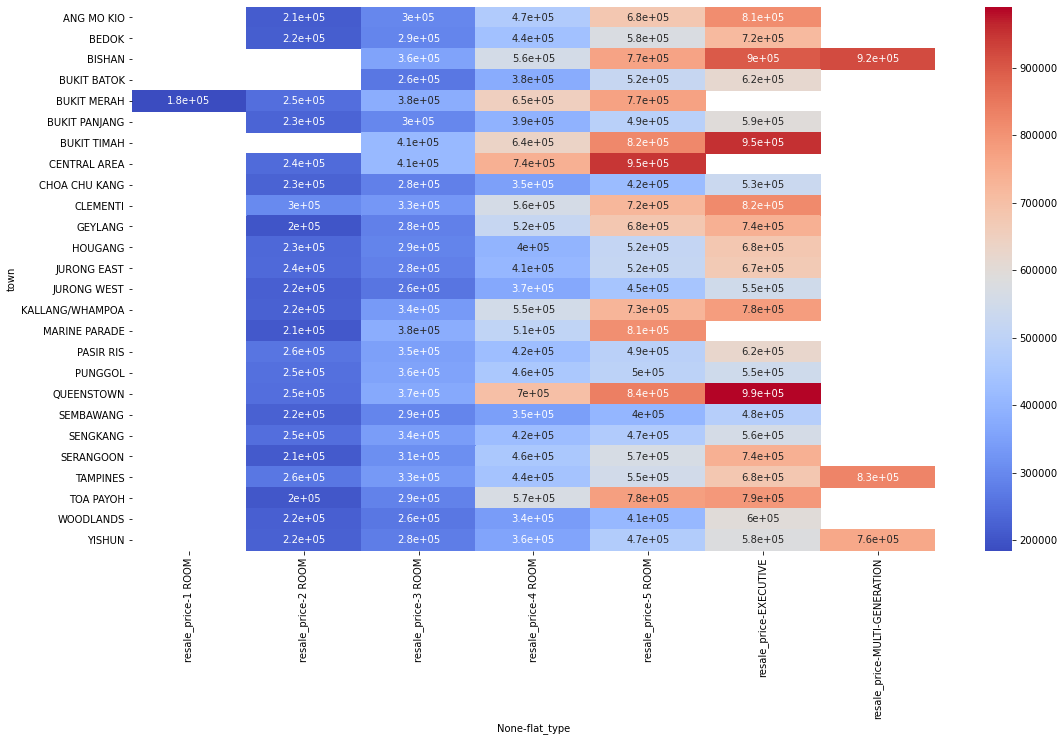

In [15]:
# Using HEAT MAP to show the Mean Resale Price By Town and Flat Type

plt.figure(figsize=(18, 10))
sns.heatmap(group2, cmap="coolwarm",annot=True)
plt.show()

From the above, we can see that 1 room flats are only transacted in the older town of Bukit Merah and the multi-generation flat type are in the outer regions of Tampines and Yishun as well as in Bishan. The heatmap shows that multi-generation flats command the highest selling price in their respective towns and one of the highest across all flat types in Singapore.

As expected, the flats in the central regions of Singapore (Bishan, Bukit Merah, Bukit Timah, Central, Queenstown, Toa Payoh) are more expensive, with the highest resale prices for Executive flats in Queenstown, Bukit Timah, Bishan and 5 room flats in Central Area. 

The high selling prices could also be due to the limited units on sale. As shown in the bar chart below, Bukit Timah and Central Area have very low number of transactions.


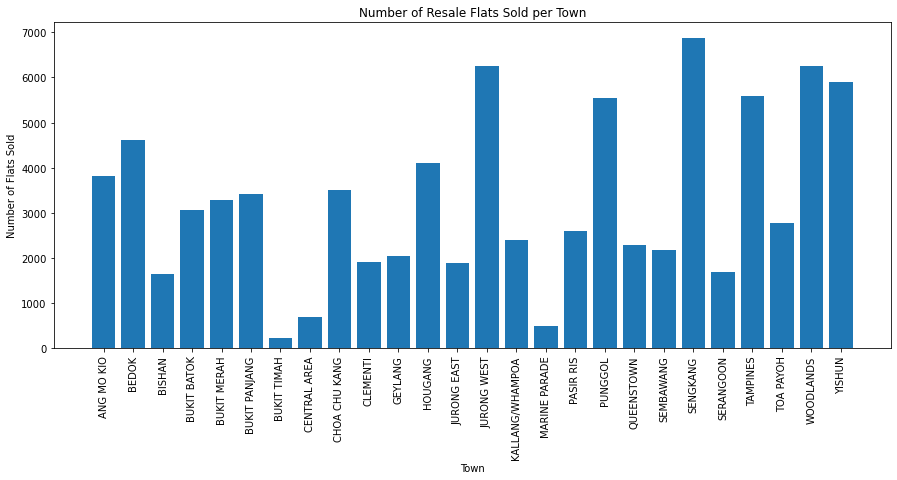

In [16]:
# Using BAR CHART to show the Number of Resale Flats Sold Per Town

town_counts = {}

for town in hdb_data["town"]:
    if town not in town_counts:
        town_counts[town] = 1
    else:
        town_counts[town] += 1

plt.figure(figsize=(15, 6))
plt.title('Number of Resale Flats Sold per Town')
plt.bar(x=town_counts.keys(), height=town_counts.values())

plt.xlabel('Town')
plt.ylabel('Number of Flats Sold')
plt.xticks(rotation=90)
plt.show()

We can see from the bar chart that Sengkang, Jurong West, Woodlands, Yishun, Tampines, Punggol have high number of resale transactions. These are the larger and relatively newer townships. From the heatmap above, the mean prices of the flats are below that of the other towns across the various flat types

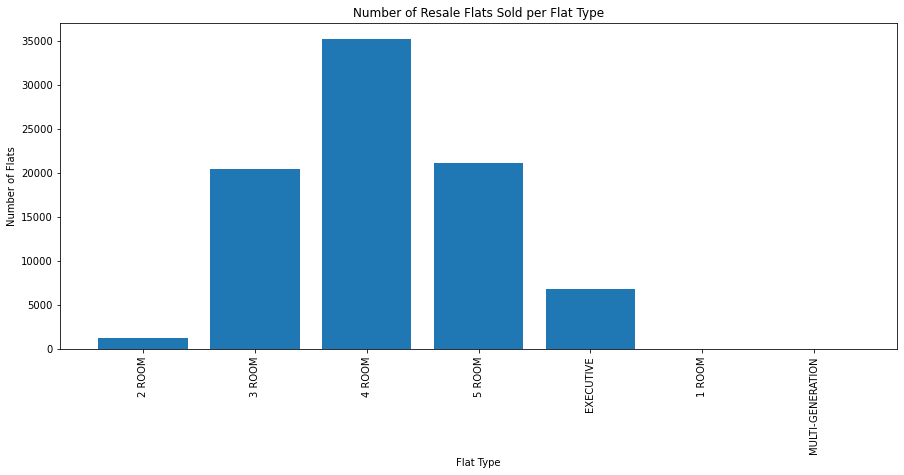

In [17]:
# Using BAR CHART to show the Number of Resale Flats Sold Per Flat Type

counts = {}

for flat in hdb_data["flat_type"]:
    if flat not in counts:
        counts[flat] = 1
    else:
        counts[flat] += 1
        
plt.figure(figsize=(15, 6))
plt.title('Number of Resale Flats Sold per Flat Type')

plt.bar(x=counts.keys(), height=counts.values())

plt.ylabel('Number of Flats')
plt.xlabel('Flat Type')
plt.xticks(rotation=90)
plt.show()

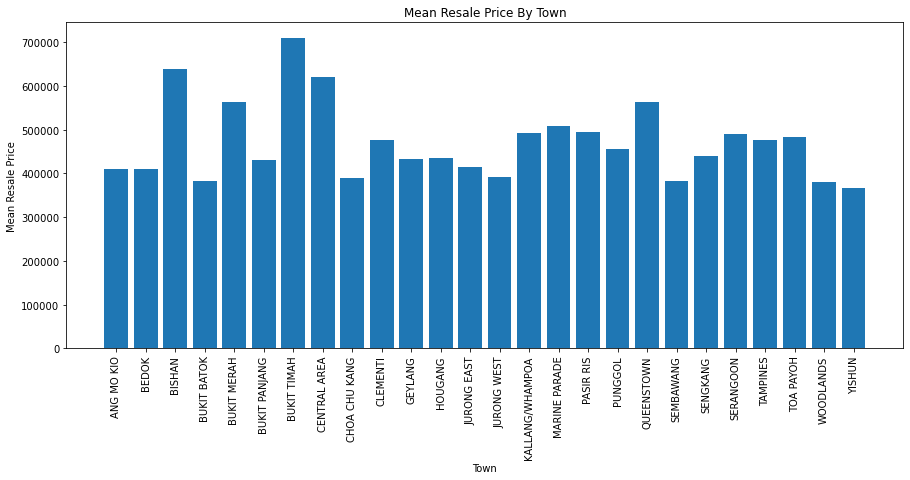

In [18]:
# Using BAR CHART to show the Mean Resale Price By Town

group3 = data_group1.groupby(["town"],as_index=False).mean() # compute Mean Resale Price by Town

plt.figure(figsize=(15, 6))
plt.title("Mean Resale Price By Town")

plt.bar(x=group3["town"], height=group3["resale_price"])

plt.xlabel("Town")
plt.ylabel("Mean Resale Price")
plt.xticks(rotation=90)
plt.show()

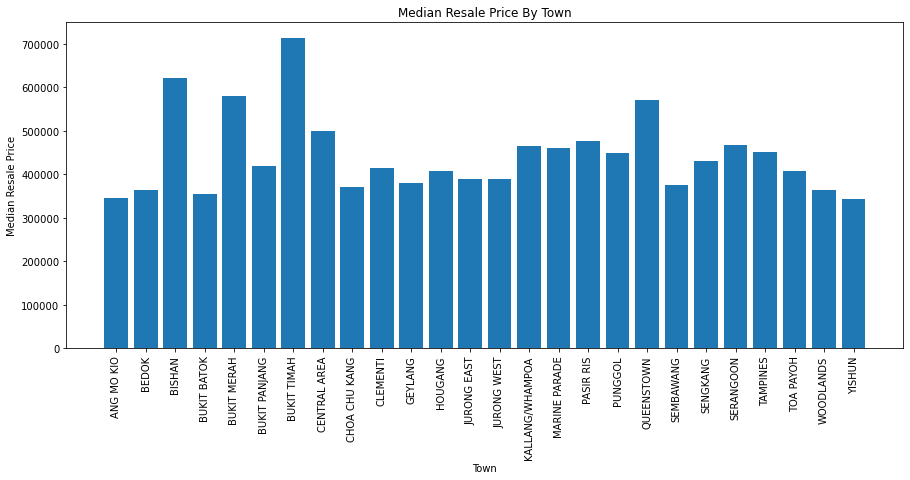

In [19]:
# Using BAR CHART to show the Medium Resale Price By Town

group4 = data_group1.groupby(["town"],as_index=False).median() # compute Median Resale Price by Town

plt.figure(figsize=(15, 6))
plt.title("Median Resale Price By Town")

plt.bar(x=group4["town"], height=group4["resale_price"])

plt.xlabel("Town")
plt.ylabel("Median Resale Price")
plt.xticks(rotation=90)
plt.show()

Bar charts of the mean and median prices by town shows that there are larger differences in towns such as Central. This is likely due to the ‘million dollar’ resale flats. These are by far a small proportion, as shown by the bar charts of the mean and median prices by flat types, which are around similar price levels

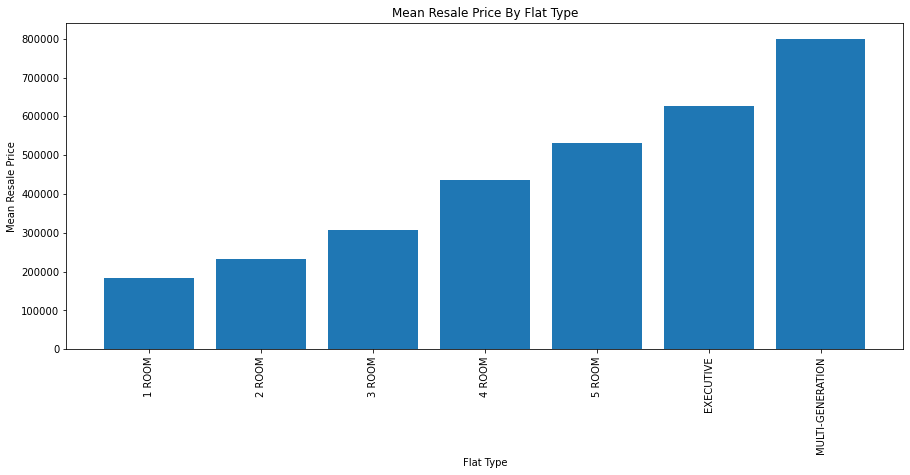

In [20]:
# Using BAR CHART to show the Mean Resale Price By Flat Type

group5 = data_group1.groupby(["flat_type"],as_index=False).mean() # compute Mean Resale Price by Flat Type

plt.figure(figsize=(15, 6))
plt.title("Mean Resale Price By Flat Type")

plt.bar(x=group5["flat_type"], height=group5["resale_price"])

plt.xlabel("Flat Type")
plt.ylabel("Mean Resale Price")
plt.xticks(rotation=90)
plt.show()

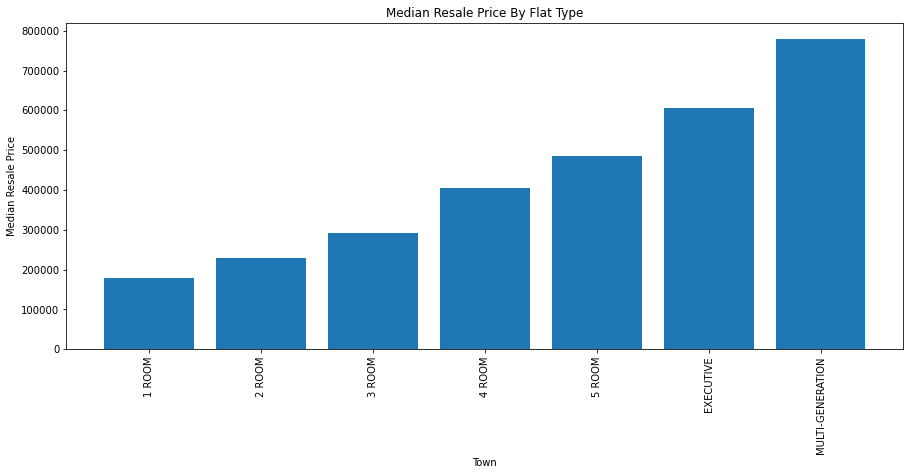

In [21]:
# Using BAR CHART to show the Medium Resale Price By Flat Type

group6 = data_group1.groupby(["flat_type"],as_index=False).median() # compute Median Resale Price by Flat Type

plt.figure(figsize=(15, 6))
plt.title("Median Resale Price By Flat Type")

plt.bar(x=group6["flat_type"], height=group6["resale_price"])

plt.xlabel("Town")
plt.ylabel("Median Resale Price")
plt.xticks(rotation=90)
plt.show()

In [22]:
# DO data formating into structure for analysis

x = hdb_data["floor_area_sqm"]
y = hdb_data["resale_price"]
z = y / x # compute the price per sqm

# display(type(x))
# display(x)

# display(type(y))
# display(y)

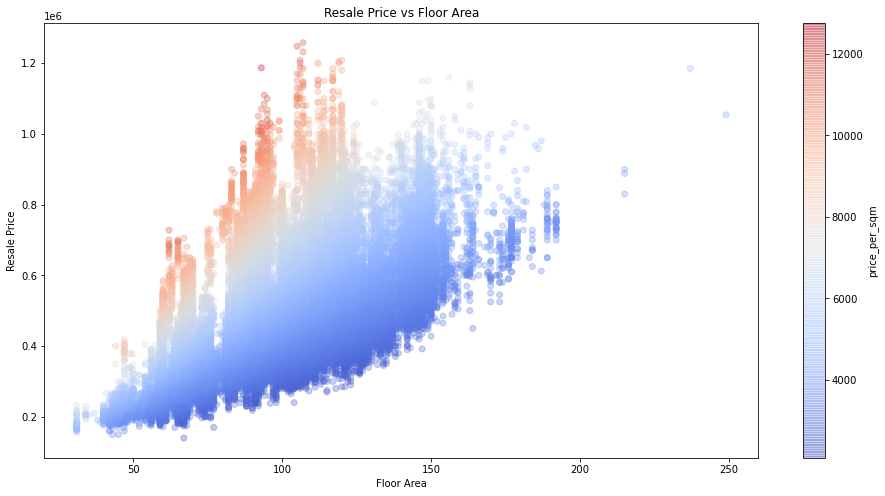

In [23]:
# Using SCATTER PLOT to visualize the correlation of Floor Area vs Resale Price

plt.figure(figsize=(16, 8))
plt.title("Resale Price vs Floor Area")
plt.xlabel("Floor Area") 
plt.ylabel("Resale Price") 

plt.scatter(x, y, c=z, cmap='coolwarm', alpha=0.3) # alpha 0-1 - highest being most opaque
plt.colorbar(label='price_per_sqm')
plt.show()

From the scatter plot, we can see that there is a positive correlation of the floor area to the resale prices. However, the same floor area do have huge variation in resale prices. This could very likely due to location of the flats, in the Central or Outer regions of Singapore. We can see that the highest flat prices have floor areas up to ~125 square meters.

In [24]:
# Computing CORRELATION between x and y -> Pearson Coefficient and P-value
# Use Scipy stats

pearson_coef, p_value = stats.pearsonr(x,y)
print("Pearson Coefficient =",pearson_coef)
print("P-value =",p_value)

# stats.pearsonr(x,y) # research to interpret this results

Pearson Coefficient = 0.6304202430532084
P-value = 0.0


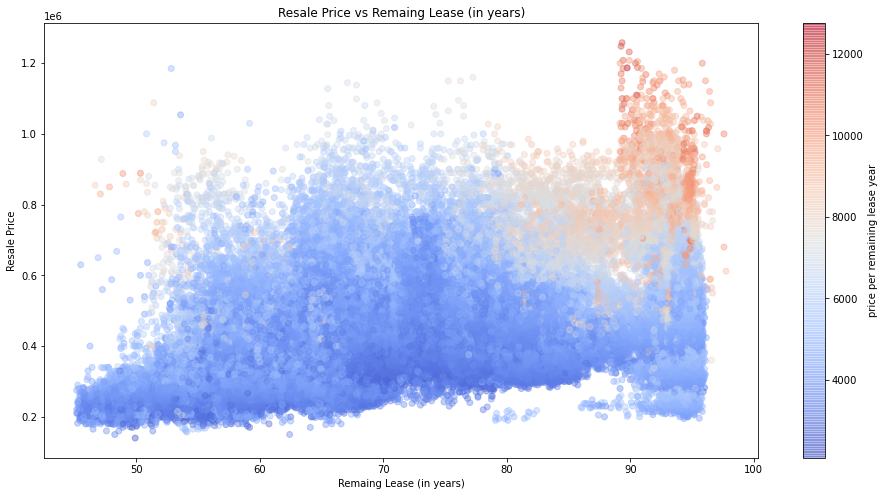

In [25]:
# Using SCATTER PLOT to visualize the correlation of Remaining Lease vs Resale Price
lease_data = hdb_data["remaining_lease"]/365
price_data = hdb_data["resale_price"]


plt.figure(figsize=(16, 8))
plt.title("Resale Price vs Remaing Lease (in years)")
plt.xlabel("Remaing Lease (in years)") 
plt.ylabel("Resale Price") 

plt.scatter(lease_data, price_data, c=z, cmap='coolwarm', alpha=0.4) # alpha 0-1 - highest being most opaque
plt.colorbar(label='price per remaining lease year')
plt.show()

Here we can see there is a positive correlation of the remaining lease term to the resale prices. The high resale flats are those that have remaining lease of more than 80 years. There are a few exceptions where the remaining lease is less than 50 years.

<AxesSubplot:xlabel='resale_price'>

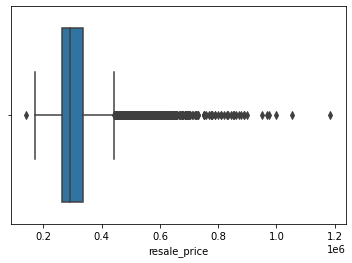

In [26]:
# Use Boxplot

room = "3 ROOM"
room_data = hdb_data[hdb_data["flat_type"] == room ]

y1 = room_data["resale_price"]
sns.boxplot(y1)

In [27]:
room_list = (hdb_data["flat_type"].unique()).tolist()
print(room_list)
print(type(room_list)) # 9 HDB flati type

['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM', 'MULTI-GENERATION']
<class 'list'>


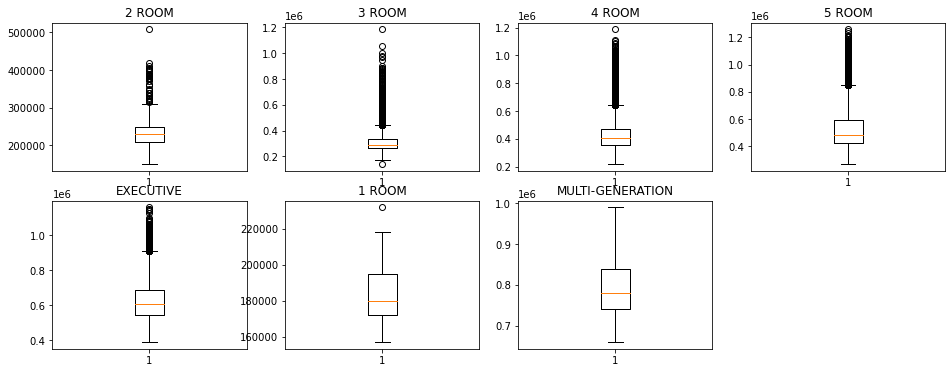

In [28]:
# REVISION on this section - 9 Feb 21 

fig = plt.figure(figsize=(16,6))

plot_window = [241,242,243,244,245,246,247]
plot_count = 0

for i in room_list:
    room_data1 = hdb_data[hdb_data["flat_type"] == i ]
    y2 = room_data1["resale_price"]
    fig.add_subplot(plot_window[plot_count]).boxplot(y2) 
    fig.add_subplot(plot_window[plot_count]).set_title(i)
    plot_count +=1


From the box plots, we can see that there are a number of outliers from the 2 room to Executive flat types, largely arising from the ‘million dollar’ resale flats. The distribution of resale prices for multi-generation flat type is wide. This could be due to the low number of such flat type transactions, as shown the bar chart above.

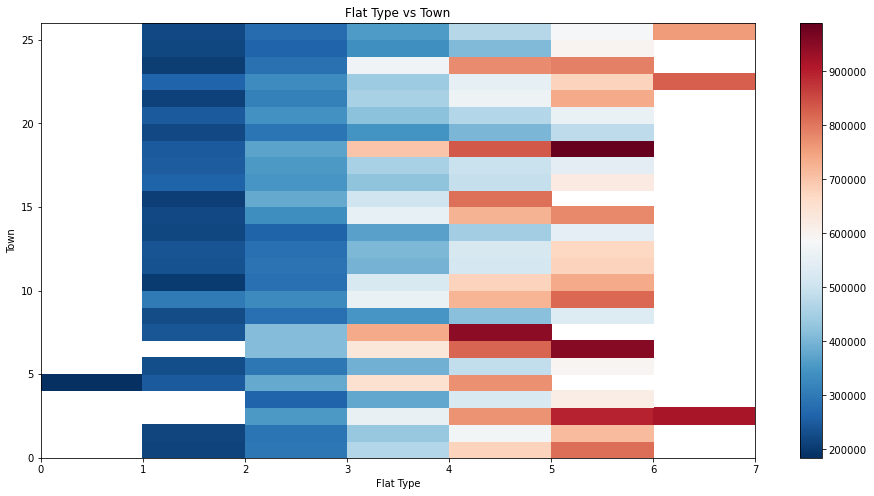

In [29]:
# using Heatmap on <group2>

plt.figure(figsize=(16, 8))
plt.pcolor(group2,cmap="RdBu_r")
plt.colorbar()
plt.title("Flat Type vs Town")
plt.xlabel("Flat Type") 
plt.ylabel("Town") 
plt.show()

(0.0, 1313900.0)

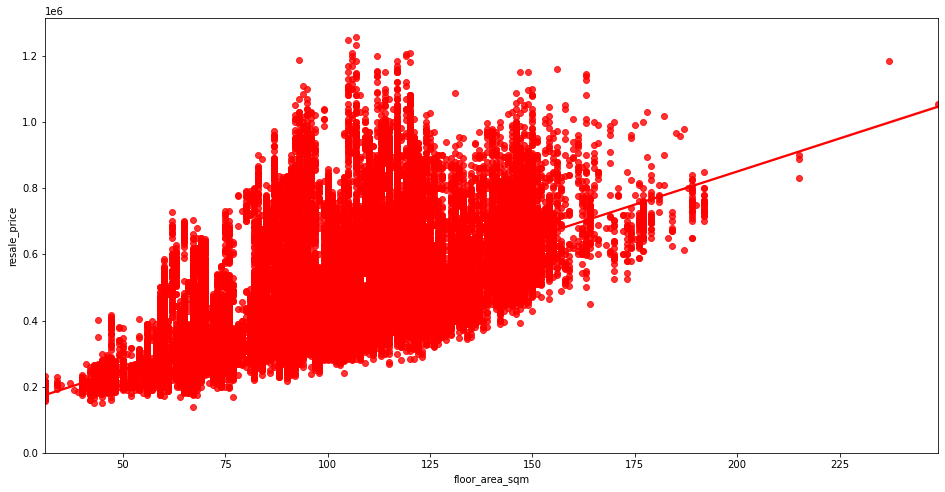

In [30]:
# Correlation using Linear Regression Plot

plt.figure(figsize=(16, 8))
sns.regplot(x,y,data=hdb_data,color="red") # show POSITIVE LINEAR relationship
plt.ylim(0,)

<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

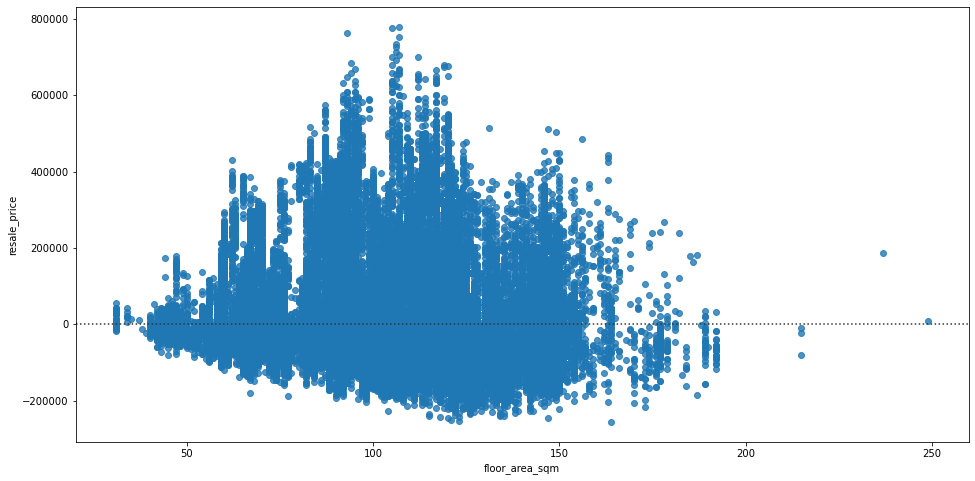

In [31]:
# EVALUATE the model (linear regression) using Residual Plot

plt.figure(figsize=(16, 8))
sns.residplot(x,y) # check on how to interpret this evaluation result

In [32]:
# EVALUATE the model (linear regression) using DISTRIBUTION PLOT

# TO CHECK ON HOW TO DO IT

In [33]:
# CORRELATION MATRIX

matrix1 = hdb_data[["floor_area_sqm","resale_price"]]
display(matrix1)


,floor_area_sqm,resale_price
0,44.0,232000.0
1,67.0,250000.0
2,67.0,262000.0
3,68.0,265000.0
4,67.0,265000.0
...,...,...
85124,146.0,555000.0
85125,142.0,545000.0
85126,145.0,645000.0
85127,145.0,660000.0


In [34]:
matrix2 = matrix1.corr()
matrix2

,floor_area_sqm,resale_price
floor_area_sqm,1.00000,0.63042
resale_price,0.63042,1.00000


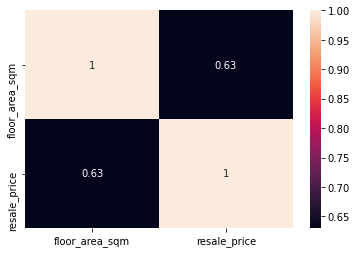

In [35]:
sns.heatmap(matrix2, annot=True)
plt.show()

### 3.1 Build Data Model

In [36]:
# Doing SIMPLE LINEAR REGRESSION (SLR) 
# Using scikit-learn
# SEE earlier practice on "HDB Resales Price using Linear Regression"

import numpy as np
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_x = np.array(list(hdb_data["floor_area_sqm"])).reshape(-1,1) # create 2D array for predictor/independant variable
model_y = list(hdb_data["resale_price"]) # create 1D array for target/dependant variable

model_1.fit(model_x,model_y)

print("Coefficients:", model_1.coef_) # y = mx + c where m is the coefficient and c is the intercept
print("\nIntercept:", model_1.intercept_)

# Evaluation of Model using R-Squared
# To determine how good the model fits on the dataset
print("\nR-Squared:",model_1.score(model_x,model_y))

Coefficients: [3994.85517291]

Intercept: 51143.27056565165

R-Squared: 0.39742968285126634


In [37]:
prediction = model_1.predict(model_x)
display(model_y[:5])
display(prediction[:5])

[232000.0, 250000.0, 262000.0, 265000.0, 265000.0]

array([226916.89817378, 318798.56715076, 318798.56715076, 322793.42232367,
       318798.56715076])

In [38]:
# Doing PREDICTION on the trained Model (Linear Regression)

predict_size = int(input("Enter the size of HDB Flat - "))
predict_price = float(model_1.predict([[predict_size]]))
print("The predicted resale price - ${:.0f}".format(predict_price))

Enter the size of HDB Flat - 55
The predicted resale price - $270860


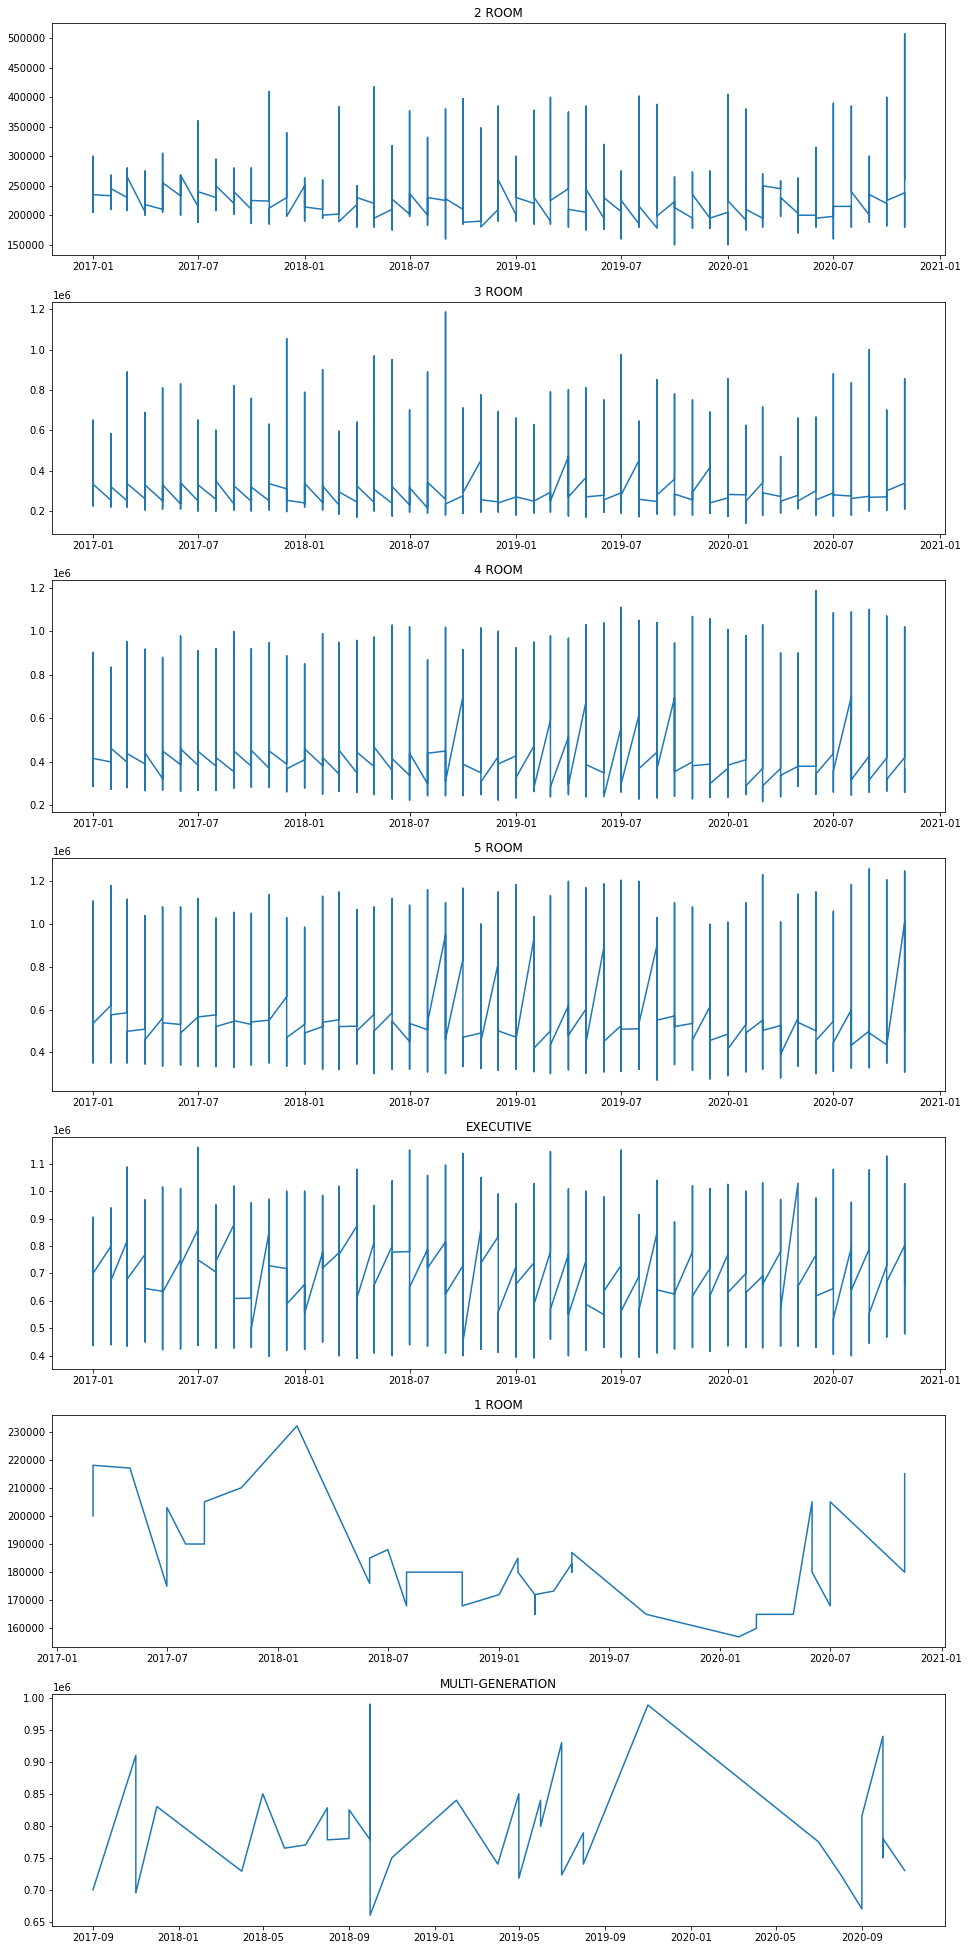

In [39]:
# Visualize resale-price by month by flat type

fig = plt.figure(figsize=(16,35))

plot_window = [711,712,713,714,715,716,717]
plot_count = 0

for i in room_list:
    room_data1 = hdb_data[hdb_data["flat_type"] == i ]
    y3 = room_data1["resale_price"]
    x3 = room_data1["month"]
    
    fig.add_subplot(plot_window[plot_count]).plot(x3,y3) 
    fig.add_subplot(plot_window[plot_count]).set_title(i)
    plot_count +=1


In [40]:
econ_data = pd.read_excel("Economical Data.xlsx")
econ_data

,Year,Unemployment Rate,CPI,Household Income,GDP
0,2000-01-01,4.6,74.435,5947,193130.9
1,2001-01-01,3.0,75.190,6417,191066.3
2,2002-01-01,4.5,74.896,6229,198545.8
3,2003-01-01,4.7,75.261,6276,207551.4
4,2004-01-01,4.7,76.518,6285,227932.1
5,2005-01-01,4.4,76.877,6593,244705.7
6,2006-01-01,3.5,77.617,6792,266741.8
7,2007-01-01,3.1,79.251,7431,290807.6
8,2008-01-01,3.0,84.504,8414,296240.6
9,2009-01-01,4.5,85.008,8195,296599.0


In [41]:
# Use GROUPBY to compute the MEAN resale price by Town and Flat Type

data_group3 = hdb_data[["month","flat_type","resale_price"]]
display(data_group3)

group3 = data_group3.groupby(["month","flat_type"],as_index=False).mean()
display(group3)



,month,flat_type,resale_price
0,2017-01-01,2 ROOM,232000.0
1,2017-01-01,3 ROOM,250000.0
2,2017-01-01,3 ROOM,262000.0
3,2017-01-01,3 ROOM,265000.0
4,2017-01-01,3 ROOM,265000.0
...,...,...,...
85124,2020-11-01,EXECUTIVE,555000.0
85125,2020-11-01,EXECUTIVE,545000.0
85126,2020-11-01,EXECUTIVE,645000.0
85127,2020-11-01,EXECUTIVE,660000.0


,month,flat_type,resale_price
0,2017-01-01,2 ROOM,242527.777778
1,2017-01-01,3 ROOM,318483.656627
2,2017-01-01,4 ROOM,430048.488000
3,2017-01-01,5 ROOM,516695.730469
4,2017-01-01,EXECUTIVE,622725.974684
...,...,...,...
277,2020-11-01,3 ROOM,328863.427466
278,2020-11-01,4 ROOM,466046.912065
279,2020-11-01,5 ROOM,559505.550889
280,2020-11-01,EXECUTIVE,652035.747368


# SKUNKWORKS (PLEASE REMOVE IN FINAL)

To-do:

* Random Forest Classifier
* XGBoost Classifier
* Get geodata working (map, distances from blocks to amenities => new synthetic features)

In [42]:
# This needs debugging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
    )
voting_clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [43]:
rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

NameError: name 'RandomForestRegressor' is not defined

### Gradient Boosting Classifier (eventually 3.1-3.4)

In [44]:
# Also needs debugging
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

NameError: name 'X_train' is not defined

### Geodata (eventually 2.5)

* Maps
* Blocks and amenities with co-ordinates
* Distances
* Synthetic feature for distance to amenitytype for given block (maybe cap at 2? MRT + Mall)